In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [2]:
df1=pd.read_excel(r'AMC_health_and_safety_data.xlsx',sheet_name='Data')


In [3]:
df1.head(5)

,DOCUMENT_NO,SUBUNIT_CD,SUBUNIT,ACCIDENT_DT,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,DEGREE_INJURY_CD,...,DAYS_LOST,TRANS_TERM,RETURN_TO_WORK_DT,IMMED_NOTIFY_CD,IMMED_NOTIFY,INVEST_BEGIN_DT,NARRATIVE,CLOSED_DOC_NO,COAL_METAL_IND,CLASSIFICATION
0,220143000000,30,MILL OPERATION/PREPARATION PLANT,9/8/2014,2014,3,2014,4,1330,6,...,0.0,N,9/9/2014,?,NO VALUE FOUND,NaN,ee was moving a caustic line when the line fel...,NaN,C,HANDLING OF MATERIALS
1,220163000000,1,UNDERGROUND,10/26/2016,2016,4,2017,1,1400,3,...,11.0,N,11/9/2016,?,NO VALUE FOUND,NaN,employee was building and plastering a brattic...,3.201630e+11,C,HANDLING OF MATERIALS
2,220053000000,3,"STRIP, QUARY, OPEN PIT",10/4/2005,2005,4,2006,1,1325,3,...,1.0,N,10/6/2005,?,NO VALUE FOUND,NaN,he was lifting a piece of steel. he place a ch...,NaN,C,HANDLING OF MATERIALS
3,220063000000,30,MILL OPERATION/PREPARATION PLANT,10/17/2006,2006,4,2007,1,1140,3,...,0.0,NaN,NaN,?,NO VALUE FOUND,NaN,the technician was greasing on the sample syst...,NaN,C,HANDLING OF MATERIALS
4,220151000000,1,UNDERGROUND,2/11/2015,2015,1,2015,2,1430,3,...,9.0,Y,2/27/2015,?,NO VALUE FOUND,NaN,"as employee was lifting top frame of 84"" struc...",3.201510e+11,C,HANDLING OF MATERIALS


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36016 entries, 0 to 36015
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DOCUMENT_NO          36016 non-null  int64  
 1   SUBUNIT_CD           36016 non-null  int64  
 2   SUBUNIT              36016 non-null  object 
 3   ACCIDENT_DT          36016 non-null  object 
 4   CAL_YR               36016 non-null  int64  
 5   CAL_QTR              36016 non-null  int64  
 6   FISCAL_YR            36016 non-null  int64  
 7   FISCAL_QTR           36016 non-null  int64  
 8   ACCIDENT_TIME        36016 non-null  int64  
 9   DEGREE_INJURY_CD     36016 non-null  object 
 10  DEGREE_INJURY        36016 non-null  object 
 11  FIPS_STATE_CD        36016 non-null  int64  
 12  UG_LOCATION_CD       36016 non-null  object 
 13  UG_LOCATION          36016 non-null  object 
 14  UG_MINING_METHOD_CD  36016 non-null  object 
 15  UG_MINING_METHOD     36016 non-null 

In [5]:
df1.shape

(36016, 49)

There are around 49 Features involved in the DataFrame above

In [6]:
col_list=df1.columns
col_list

Index(['DOCUMENT_NO', 'SUBUNIT_CD', 'SUBUNIT', 'ACCIDENT_DT', 'CAL_YR',
       'CAL_QTR', 'FISCAL_YR', 'FISCAL_QTR', 'ACCIDENT_TIME',
       'DEGREE_INJURY_CD', 'DEGREE_INJURY', 'FIPS_STATE_CD', 'UG_LOCATION_CD',
       'UG_LOCATION', 'UG_MINING_METHOD_CD', 'UG_MINING_METHOD',
       'MINING_EQUIP_CD', 'MINING_EQUIP', 'EQUIP_MFR_CD', 'EQUIP_MFR_NAME',
       'EQUIP_MODEL_NO', 'SHIFT_BEGIN_TIME', 'ACCIDENT_TYPE', 'NO_INJURIES',
       'TOT_EXPER', 'MINE_EXPER', 'JOB_EXPER', 'OCCUPATION_CD', 'OCCUPATION',
       'ACTIVITY_CD', 'ACTIVITY', 'INJURY_SOURCE_CD', 'INJURY_SOURCE',
       'NATURE_INJURY_CD', 'NATURE_INJURY', 'INJ_BODY_PART_CD',
       'INJ_BODY_PART', 'SCHEDULE_CHARGE', 'DAYS_RESTRICT', 'DAYS_LOST',
       'TRANS_TERM', 'RETURN_TO_WORK_DT', 'IMMED_NOTIFY_CD', 'IMMED_NOTIFY',
       'INVEST_BEGIN_DT', 'NARRATIVE', 'CLOSED_DOC_NO', 'COAL_METAL_IND',
       'CLASSIFICATION'],
      dtype='object')

In [7]:
df1['SUBUNIT_CD'].unique()

array([30,  1,  3,  2, 99,  5,  4, 17,  6], dtype=int64)

In [8]:
df1['SUBUNIT'].unique()

array(['MILL OPERATION/PREPARATION PLANT', 'UNDERGROUND',
       'STRIP, QUARY, OPEN PIT', 'SURFACE AT UNDERGROUND',
       'OFFICE WORKERS AT MINE SITE', 'CULM BANK/REFUSE PILE', 'AUGER',
       'INDEPENDENT SHOPS OR YARDS', 'DREDGE'], dtype=object)

In [9]:
df1['CLASSIFICATION'].unique()

array(['HANDLING OF MATERIALS', 'SLIP OR FALL OF PERSON', 'HAULAGE',
       'FIRE/EXPLOSION', 'EXPLOSIVES AND BREAKING AGENTS', 'ELECTRICAL',
       'EXPLODING VESSELS UNDER PRESSURE', 'TOXIC', 'ENTRAPMENT',
       'INUNDATION', 'OTHER'], dtype=object)

In [10]:
df1['DEGREE_INJURY_CD'].unique()

array(['6', '3', '5', '4', '2', '10', '9', '?', '8', '1', '0', '7'],
      dtype=object)

In [11]:
df1.isnull().sum()

DOCUMENT_NO                0
SUBUNIT_CD                 0
SUBUNIT                    0
ACCIDENT_DT                0
CAL_YR                     0
CAL_QTR                    0
FISCAL_YR                  0
FISCAL_QTR                 0
ACCIDENT_TIME              0
DEGREE_INJURY_CD           0
DEGREE_INJURY              0
FIPS_STATE_CD              0
UG_LOCATION_CD             0
UG_LOCATION                0
UG_MINING_METHOD_CD        0
UG_MINING_METHOD           0
MINING_EQUIP_CD            0
MINING_EQUIP               0
EQUIP_MFR_CD               0
EQUIP_MFR_NAME             0
EQUIP_MODEL_NO         20081
SHIFT_BEGIN_TIME          32
ACCIDENT_TYPE              0
NO_INJURIES                0
TOT_EXPER               2729
MINE_EXPER              2313
JOB_EXPER               2199
OCCUPATION_CD              0
OCCUPATION                 0
ACTIVITY_CD                0
ACTIVITY                   0
INJURY_SOURCE_CD           0
INJURY_SOURCE              0
NATURE_INJURY_CD           0
NATURE_INJURY 

Let us drop the columns which have a lot of missing values and also the columns which are not needed as
they are already shown via a particyular code.
These columns/features are:
    Document no.
    sub_unit
    Fiscal Qtr
    Fiscal year
    degree_injury
    UG_location
    Mining Equipment
    Equipment_mfr_cd
    Schedule_charge
    days_restrict
    immed_notify
    Invest_begin_date
    Narrative
    closed_id
    


In [12]:
new_df1=df1.drop(['DOCUMENT_NO','SUBUNIT','FISCAL_YR','FISCAL_QTR','DEGREE_INJURY','UG_LOCATION','UG_MINING_METHOD','MINING_EQUIP','EQUIP_MFR_NAME','EQUIP_MODEL_NO','SHIFT_BEGIN_TIME','OCCUPATION','ACTIVITY','INJURY_SOURCE','NATURE_INJURY','INJ_BODY_PART', 'SCHEDULE_CHARGE','DAYS_LOST','TRANS_TERM', 'IMMED_NOTIFY','INVEST_BEGIN_DT', 'NARRATIVE', 'CLOSED_DOC_NO'],axis=1)

In [13]:
new_df1

,SUBUNIT_CD,ACCIDENT_DT,CAL_YR,CAL_QTR,ACCIDENT_TIME,DEGREE_INJURY_CD,FIPS_STATE_CD,UG_LOCATION_CD,UG_MINING_METHOD_CD,MINING_EQUIP_CD,...,OCCUPATION_CD,ACTIVITY_CD,INJURY_SOURCE_CD,NATURE_INJURY_CD,INJ_BODY_PART_CD,DAYS_RESTRICT,RETURN_TO_WORK_DT,IMMED_NOTIFY_CD,COAL_METAL_IND,CLASSIFICATION
0,30,9/8/2014,2014,3,1330,6,1,?,?,?,...,304,28,24,130,130,0.0,9/9/2014,?,C,HANDLING OF MATERIALS
1,1,10/26/2016,2016,4,1400,3,1,1,5,?,...,46,82,21,130,130,0.0,11/9/2016,?,C,HANDLING OF MATERIALS
2,3,10/4/2005,2005,4,1325,3,1,?,?,?,...,418,28,88,400,340,0.0,10/6/2005,?,C,HANDLING OF MATERIALS
3,30,10/17/2006,2006,4,1140,3,4,?,?,16,...,414,39,88,180,330,0.0,NaN,?,C,HANDLING OF MATERIALS
4,1,2/11/2015,2015,1,1430,3,8,6,1,?,...,116,28,88,330,440,0.0,2/27/2015,?,C,HANDLING OF MATERIALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36011,1,11/7/2008,2008,4,2054,8,51,2,5,?,...,418,34,127,340,600,0.0,NaN,?,C,OTHER
36012,3,1/3/2006,2006,1,2200,6,51,?,?,?,...,304,39,92,320,130,0.0,1/3/2006,?,C,OTHER
36013,2,10/18/2004,2004,4,730,8,54,?,?,?,...,36,9,127,340,600,0.0,NaN,?,C,OTHER
36014,1,5/2/2018,2018,2,1830,3,54,3,1,?,...,16,28,1,280,600,0.0,6/11/2018,?,C,OTHER


In [14]:
new_df1.columns


Index(['SUBUNIT_CD', 'ACCIDENT_DT', 'CAL_YR', 'CAL_QTR', 'ACCIDENT_TIME',
       'DEGREE_INJURY_CD', 'FIPS_STATE_CD', 'UG_LOCATION_CD',
       'UG_MINING_METHOD_CD', 'MINING_EQUIP_CD', 'EQUIP_MFR_CD',
       'ACCIDENT_TYPE', 'NO_INJURIES', 'TOT_EXPER', 'MINE_EXPER', 'JOB_EXPER',
       'OCCUPATION_CD', 'ACTIVITY_CD', 'INJURY_SOURCE_CD', 'NATURE_INJURY_CD',
       'INJ_BODY_PART_CD', 'DAYS_RESTRICT', 'RETURN_TO_WORK_DT',
       'IMMED_NOTIFY_CD', 'COAL_METAL_IND', 'CLASSIFICATION'],
      dtype='object')

In [15]:
indx_drop=new_df1[new_df1['DEGREE_INJURY_CD']=='?'].index #46 records with ? as the degree_injury not known

In [16]:
new_df1.drop(indx_drop,axis=0,inplace=True)

In [17]:
new_df1

,SUBUNIT_CD,ACCIDENT_DT,CAL_YR,CAL_QTR,ACCIDENT_TIME,DEGREE_INJURY_CD,FIPS_STATE_CD,UG_LOCATION_CD,UG_MINING_METHOD_CD,MINING_EQUIP_CD,...,OCCUPATION_CD,ACTIVITY_CD,INJURY_SOURCE_CD,NATURE_INJURY_CD,INJ_BODY_PART_CD,DAYS_RESTRICT,RETURN_TO_WORK_DT,IMMED_NOTIFY_CD,COAL_METAL_IND,CLASSIFICATION
0,30,9/8/2014,2014,3,1330,6,1,?,?,?,...,304,28,24,130,130,0.0,9/9/2014,?,C,HANDLING OF MATERIALS
1,1,10/26/2016,2016,4,1400,3,1,1,5,?,...,46,82,21,130,130,0.0,11/9/2016,?,C,HANDLING OF MATERIALS
2,3,10/4/2005,2005,4,1325,3,1,?,?,?,...,418,28,88,400,340,0.0,10/6/2005,?,C,HANDLING OF MATERIALS
3,30,10/17/2006,2006,4,1140,3,4,?,?,16,...,414,39,88,180,330,0.0,NaN,?,C,HANDLING OF MATERIALS
4,1,2/11/2015,2015,1,1430,3,8,6,1,?,...,116,28,88,330,440,0.0,2/27/2015,?,C,HANDLING OF MATERIALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36011,1,11/7/2008,2008,4,2054,8,51,2,5,?,...,418,34,127,340,600,0.0,NaN,?,C,OTHER
36012,3,1/3/2006,2006,1,2200,6,51,?,?,?,...,304,39,92,320,130,0.0,1/3/2006,?,C,OTHER
36013,2,10/18/2004,2004,4,730,8,54,?,?,?,...,36,9,127,340,600,0.0,NaN,?,C,OTHER
36014,1,5/2/2018,2018,2,1830,3,54,3,1,?,...,16,28,1,280,600,0.0,6/11/2018,?,C,OTHER


In [18]:
indx_drop2=new_df1[new_df1['UG_LOCATION_CD']=='?'].index


In [19]:
new_df1.drop(indx_drop2,axis=0,inplace=True)

In [20]:
new_df1.shape

(24459, 26)

In [21]:
indx_drop3=new_df1[new_df1['UG_MINING_METHOD_CD']=='?'].index
new_df1.drop(indx_drop3,axis=0,inplace=True)


In [22]:
new_df1.columns

Index(['SUBUNIT_CD', 'ACCIDENT_DT', 'CAL_YR', 'CAL_QTR', 'ACCIDENT_TIME',
       'DEGREE_INJURY_CD', 'FIPS_STATE_CD', 'UG_LOCATION_CD',
       'UG_MINING_METHOD_CD', 'MINING_EQUIP_CD', 'EQUIP_MFR_CD',
       'ACCIDENT_TYPE', 'NO_INJURIES', 'TOT_EXPER', 'MINE_EXPER', 'JOB_EXPER',
       'OCCUPATION_CD', 'ACTIVITY_CD', 'INJURY_SOURCE_CD', 'NATURE_INJURY_CD',
       'INJ_BODY_PART_CD', 'DAYS_RESTRICT', 'RETURN_TO_WORK_DT',
       'IMMED_NOTIFY_CD', 'COAL_METAL_IND', 'CLASSIFICATION'],
      dtype='object')

In [23]:
new_df1.dropna(subset=['TOT_EXPER', 'MINE_EXPER', 'JOB_EXPER'],inplace=True)

In [24]:
new_df1[['TOT_EXPER', 'MINE_EXPER', 'JOB_EXPER']].isnull().sum()

TOT_EXPER     0
MINE_EXPER    0
JOB_EXPER     0
dtype: int64

In [25]:

indx5=new_df1[new_df1['INJ_BODY_PART_CD']=='?'].index

indx5

Int64Index([25904, 35294], dtype='int64')

In [35]:

new_df1.drop(indx4,axis=0,inplace=True)

In [27]:

indx1=new_df1[new_df1['OCCUPATION_CD']=='?'].index

new_df1.drop(indx1,axis=0,inplace=True)

In [28]:
indx2=new_df1[new_df1['ACTIVITY_CD']=='?'].index
new_df1.drop(indx2,axis=0,inplace=True)

In [29]:
indx2=new_df1[new_df1['INJURY_SOURCE_CD']=='?'].index
new_df1.drop(indx2,axis=0,inplace=True)

In [30]:
new_df1.shape

(20715, 26)

In [31]:
indx6=new_df1[new_df1['INJ_BODY_PART_CD']=='?'].index
new_df1.drop(indx6,axis=0,inplace=True)

In [44]:
indx6=new_df1[new_df1['MINING_EQUIP_CD']=='?'].index
new_df1.drop(indx6,axis=0,inplace=True)

In [45]:
new_df1.shape

(7352, 24)

In [33]:
new_df1.drop('IMMED_NOTIFY_CD',axis=1,inplace=True)

In [46]:
new_df1.shape

(7352, 24)

In [47]:
new_df1.dropna(axis=0,inplace=True)

In [48]:
new_df1.isnull().sum()

SUBUNIT_CD             0
ACCIDENT_DT            0
CAL_YR                 0
CAL_QTR                0
ACCIDENT_TIME          0
DEGREE_INJURY_CD       0
FIPS_STATE_CD          0
UG_LOCATION_CD         0
UG_MINING_METHOD_CD    0
MINING_EQUIP_CD        0
ACCIDENT_TYPE          0
NO_INJURIES            0
TOT_EXPER              0
MINE_EXPER             0
JOB_EXPER              0
OCCUPATION_CD          0
ACTIVITY_CD            0
INJURY_SOURCE_CD       0
NATURE_INJURY_CD       0
INJ_BODY_PART_CD       0
DAYS_RESTRICT          0
RETURN_TO_WORK_DT      0
COAL_METAL_IND         0
CLASSIFICATION         0
dtype: int64

In [49]:
new_df1.shape

(7352, 24)

In [38]:
new_df1.drop('EQUIP_MFR_CD',axis=1,inplace=True)

In [50]:
new_df1.shape

(7352, 24)

In [51]:
N=new_df1['MINING_EQUIP_CD']=='?'#[new_df1['MINING_EQUIP_CD']=='?']
    
    

In [52]:
N.unique()

array([False])

# Feature selection

In [84]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7352 entries, 19 to 35780
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SUBUNIT_CD           7352 non-null   int64  
 1   ACCIDENT_DT          7352 non-null   object 
 2   CAL_YR               7352 non-null   int64  
 3   CAL_QTR              7352 non-null   int64  
 4   ACCIDENT_TIME        7352 non-null   int64  
 5   DEGREE_INJURY_CD     7352 non-null   object 
 6   FIPS_STATE_CD        7352 non-null   int64  
 7   UG_LOCATION_CD       7352 non-null   object 
 8   UG_MINING_METHOD_CD  7352 non-null   object 
 9   MINING_EQUIP_CD      7352 non-null   object 
 10  ACCIDENT_TYPE        7352 non-null   object 
 11  NO_INJURIES          7352 non-null   int64  
 12  TOT_EXPER            7352 non-null   float64
 13  MINE_EXPER           7352 non-null   float64
 14  JOB_EXPER            7352 non-null   float64
 15  OCCUPATION_CD        7352 non-null  

Before applying feature selection techniques let us first convert the columns having object datatype to int64 type

convert_type={   
    'DEGREE_INJURY_CD':int,
    'UG_LOCATION_CD':int,
    'UG_MINING_METHOD_CD':int,----ONEHOT_ENODING
     'MINING_EQUIP_CD':int, 
    'ACCIDENT_TYPE':int,----one hot encoding
    'TOT_EXPER':int,
    'MINE_EXPER':int,
    'JOB_EXPER':int,
    'OCCUPATION_CD':int, 
    'ACTIVITY_CD':int,
    'INJURY_SOURCE_CD':int,
    'NATURE_INJURY_CD':int,
    'INJ_BODY_PART_CD':int, 
}

In [73]:
new_df1['OCCUPATION_CD']=new_df1['OCCUPATION_CD'].astype(int)
new_df1['ACTIVITY_CD']=new_df1['ACTIVITY_CD'].astype(int)
new_df1['INJURY_SOURCE_CD']=new_df1['INJURY_SOURCE_CD'].astype(int)
new_df1['DAYS_RESTRICT']=new_df1['DAYS_RESTRICT'].astype(int)
new_df1['DEGREE_INJURY_CD']=new_df1['DEGREE_INJURY_CD'].astype(int)
new_df1['UG_LOCATION_CD']=new_df1['UG_LOCATION_CD'].astype(int)
new_df1['UG_MINING_METHOD_CD']=new_df1['UG_MINING_METHOD_CD'].astype(int)
new_df1['MINING_EQUIP_CD']=new_df1['MINING_EQUIP_CD'].astype(int)
new_df1['NATURE_INJURY_CD']=new_df1['NATURE_INJURY_CD'].astype(int)


In [74]:
new_df1['UG_MINING_METHOD_CD']

19       5
20       5
45       5
66       5
108      5
        ..
35530    5
35559    5
35700    5
35764    8
35780    5
Name: UG_MINING_METHOD_CD, Length: 7352, dtype: int32

In [75]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7352 entries, 19 to 35780
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SUBUNIT_CD           7352 non-null   int64  
 1   DEGREE_INJURY_CD     7352 non-null   int32  
 2   UG_LOCATION_CD       7352 non-null   int32  
 3   UG_MINING_METHOD_CD  7352 non-null   int32  
 4   MINING_EQUIP_CD      7352 non-null   int32  
 5   NO_INJURIES          7352 non-null   int64  
 6   TOT_EXPER            7352 non-null   float64
 7   MINE_EXPER           7352 non-null   float64
 8   JOB_EXPER            7352 non-null   float64
 9   OCCUPATION_CD        7352 non-null   int32  
 10  ACTIVITY_CD          7352 non-null   int32  
 11  INJURY_SOURCE_CD     7352 non-null   int32  
 12  NATURE_INJURY_CD     7352 non-null   int32  
 13  INJ_BODY_PART_CD     7352 non-null   object 
 14  DAYS_RESTRICT        7352 non-null   int32  
 15  COAL_METAL_IND       7352 non-null  

In [76]:
new_df1.drop(['CAL_YR', 'CAL_QTR','ACCIDENT_TIME','FIPS_STATE_CD'],axis=1,inplace=True)

KeyError: "['CAL_YR', 'CAL_QTR', 'ACCIDENT_TIME', 'FIPS_STATE_CD'] not found in axis"

In [77]:
new_df1.columns

Index(['SUBUNIT_CD', 'DEGREE_INJURY_CD', 'UG_LOCATION_CD',
       'UG_MINING_METHOD_CD', 'MINING_EQUIP_CD', 'NO_INJURIES', 'TOT_EXPER',
       'MINE_EXPER', 'JOB_EXPER', 'OCCUPATION_CD', 'ACTIVITY_CD',
       'INJURY_SOURCE_CD', 'NATURE_INJURY_CD', 'INJ_BODY_PART_CD',
       'DAYS_RESTRICT', 'COAL_METAL_IND', 'CLASSIFICATION', 'UG_LOCATION_CD ',
       'Duration'],
      dtype='object')

In [61]:
new_df1['ACCIDENT_DT'] = pd.to_datetime(new_df1['ACCIDENT_DT'])

In [62]:
new_df1['ACCIDENT_DT'] = new_df1['ACCIDENT_DT'] .astype('datetime64[ns]')

In [63]:
new_df1['RETURN_TO_WORK_DT']=new_df1['RETURN_TO_WORK_DT'].astype('datetime64[ns]')

In [64]:
new_df1['Duration']=new_df1['RETURN_TO_WORK_DT']-new_df1['ACCIDENT_DT']

In [65]:
new_df1.drop(['ACCIDENT_DT','RETURN_TO_WORK_DT'],axis=1,inplace=True)

In [83]:
new_df1

,SUBUNIT_CD,DEGREE_INJURY_CD,UG_LOCATION_CD,UG_MINING_METHOD_CD,MINING_EQUIP_CD,NO_INJURIES,TOT_EXPER,MINE_EXPER,JOB_EXPER,OCCUPATION_CD,ACTIVITY_CD,INJURY_SOURCE_CD,NATURE_INJURY_CD,INJ_BODY_PART_CD,DAYS_RESTRICT,COAL_METAL_IND,CLASSIFICATION,Duration
19,1,6,4,5,61,1,9.00,7.00,7.00,104,39,88,220,340,0,C,HANDLING OF MATERIALS,1
20,1,6,6,5,66,1,10.00,5.00,4.00,462,28,109,180,340,0,C,HANDLING OF MATERIALS,2
45,1,5,4,5,13,1,10.00,1.00,4.00,2,28,35,160,330,4,C,HANDLING OF MATERIALS,5
66,1,3,5,5,13,1,3.00,1.50,2.50,46,41,35,330,450,0,C,HANDLING OF MATERIALS,194
108,1,6,2,5,13,1,2.46,2.46,2.46,101,39,35,220,340,0,C,HANDLING OF MATERIALS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35530,1,3,3,5,33,1,35.00,3.00,12.00,250,23,108,330,420,0,C,OTHER,182
35559,1,4,6,5,12,1,7.00,1.92,2.00,104,39,2,330,512,6,C,OTHER,56
35700,1,3,3,5,12,1,30.00,2.46,9.00,102,28,2,330,512,0,C,OTHER,102
35764,1,3,4,8,65,1,19.00,9.46,9.46,116,92,81,160,512,0,C,OTHER,139


Here we can see that accident type and injury_source almost tell us the same information, Instead we can use either of the columns.Hence we can drop Accident type.

In [67]:
new_df1.drop('ACCIDENT_TYPE',axis=1,inplace=True)

In [68]:
new_df1['UG_MINING_METHOD_CD']=new_df1['UG_MINING_METHOD_CD'].astype(int)

In [80]:
new_df1.drop(['UG_LOCATION_CD '],axis=1,inplace=True)

In [69]:
new_df1['Duration']=new_df1['Duration'].astype('string')

In [81]:
new_df1['Duration']=new_df1['Duration'].str.split(" ").str[0]

In [82]:
new_df1['Duration'].rename('Duration_days',inplace=True)

19         1
20         2
45         5
66       194
108        1
        ... 
35530    182
35559     56
35700    102
35764    139
35780      3
Name: Duration_days, Length: 7352, dtype: object

In [84]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7352 entries, 19 to 35780
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SUBUNIT_CD           7352 non-null   int64  
 1   DEGREE_INJURY_CD     7352 non-null   int32  
 2   UG_LOCATION_CD       7352 non-null   int32  
 3   UG_MINING_METHOD_CD  7352 non-null   int32  
 4   MINING_EQUIP_CD      7352 non-null   int32  
 5   NO_INJURIES          7352 non-null   int64  
 6   TOT_EXPER            7352 non-null   float64
 7   MINE_EXPER           7352 non-null   float64
 8   JOB_EXPER            7352 non-null   float64
 9   OCCUPATION_CD        7352 non-null   int32  
 10  ACTIVITY_CD          7352 non-null   int32  
 11  INJURY_SOURCE_CD     7352 non-null   int32  
 12  NATURE_INJURY_CD     7352 non-null   int32  
 13  INJ_BODY_PART_CD     7352 non-null   object 
 14  DAYS_RESTRICT        7352 non-null   int32  
 15  COAL_METAL_IND       7352 non-null  

In [85]:
new_df3=new_df1

In [86]:
dummies=pd.get_dummies(new_df3.COAL_METAL_IND)
dummies


,C,M
19,1,0
20,1,0
45,1,0
66,1,0
108,1,0
...,...,...
35530,1,0
35559,1,0
35700,1,0
35764,1,0


In [87]:
new_df3=pd.concat([new_df3,dummies],axis='columns')

In [88]:
new_df3.drop(['COAL_METAL_IND','M'],axis=1,inplace=True)

In [89]:
x_df=new_df3.drop(['CLASSIFICATION'],axis=1)
y_df=new_df3['CLASSIFICATION']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_df,y_df,test_size=0.3,random_state=50)

In [90]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train,Y_train)

In [91]:
mutual_info

array([0.01186095, 0.02162982, 0.03979261, 0.0062402 , 0.39656781,
       0.01895414, 0.        , 0.00545223, 0.00557951, 0.07422616,
       0.44342323, 0.40289842, 0.11217516, 0.12186059, 0.        ,
       0.03929818, 0.01306991])

In [92]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

ACTIVITY_CD            0.443423
INJURY_SOURCE_CD       0.402898
MINING_EQUIP_CD        0.396568
INJ_BODY_PART_CD       0.121861
NATURE_INJURY_CD       0.112175
OCCUPATION_CD          0.074226
UG_LOCATION_CD         0.039793
Duration               0.039298
DEGREE_INJURY_CD       0.021630
NO_INJURIES            0.018954
C                      0.013070
SUBUNIT_CD             0.011861
UG_MINING_METHOD_CD    0.006240
JOB_EXPER              0.005580
MINE_EXPER             0.005452
TOT_EXPER              0.000000
DAYS_RESTRICT          0.000000
dtype: float64

<AxesSubplot:>

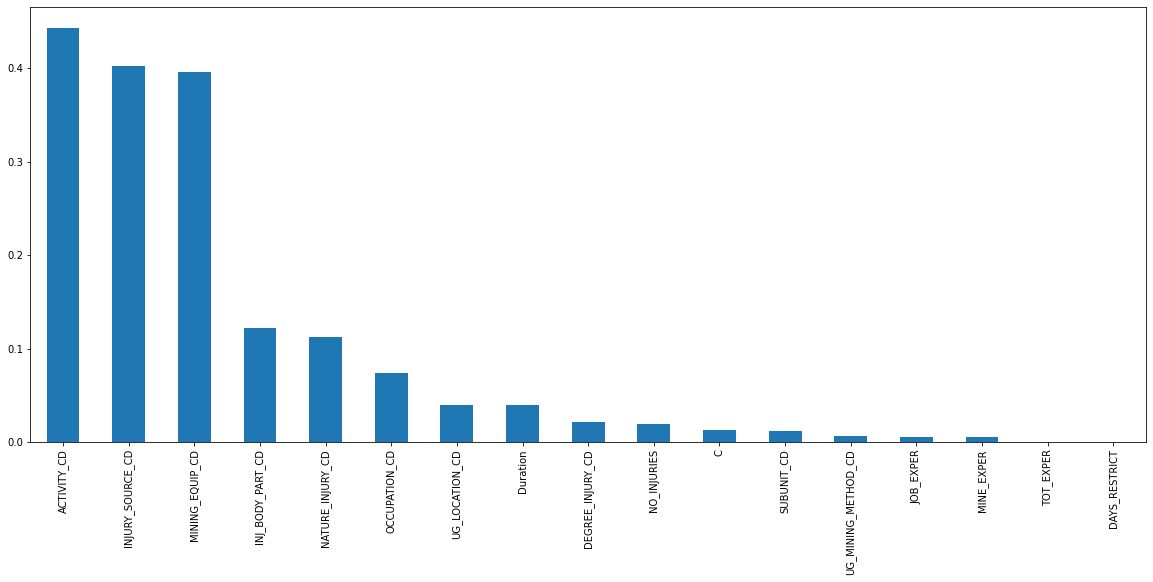

In [93]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

let us take the top 12 features into account 
These are :
    1.Activity_CD
    2.Injury_Source
    3.Mining_equipment
    4.INJ_BODY_PART
    5. NATURE_INJURY
    6.DURATION
    7.UG_LOCATION
    8.UG_MINING_METHOD
    9.SUB_UNIT_CD_
    10.COL_METAL_IND_C
    11.NO_INJURIES
    12.TOTAL_EXPERIENCE
    

<AxesSubplot:>

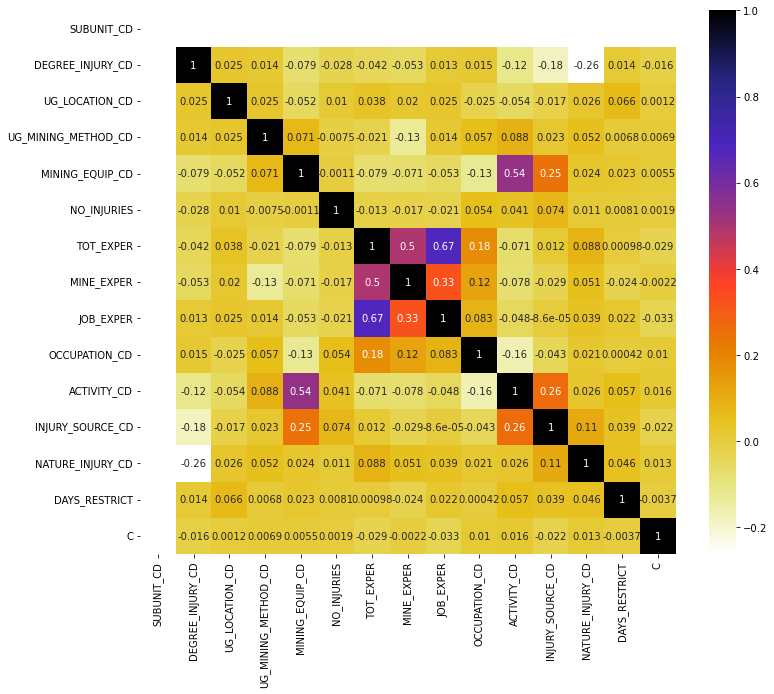

In [94]:
plt.figure(figsize=(12,10))
#Using Pearson Correlation
cor=X_train.corr()
sbn.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)

In [95]:
def correlation(dataset,thres):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>thres:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [96]:
corr_features=correlation(X_train,0.5)
corr_features


{'ACTIVITY_CD', 'JOB_EXPER'}

Therefore we can drop Coal_METAL_IND_M ,JOB_EXPERIENCE,UG_MIning_method

In [97]:
new_df3.columns

Index(['SUBUNIT_CD', 'DEGREE_INJURY_CD', 'UG_LOCATION_CD',
       'UG_MINING_METHOD_CD', 'MINING_EQUIP_CD', 'NO_INJURIES', 'TOT_EXPER',
       'MINE_EXPER', 'JOB_EXPER', 'OCCUPATION_CD', 'ACTIVITY_CD',
       'INJURY_SOURCE_CD', 'NATURE_INJURY_CD', 'INJ_BODY_PART_CD',
       'DAYS_RESTRICT', 'CLASSIFICATION', 'Duration', 'C'],
      dtype='object')

<AxesSubplot:>

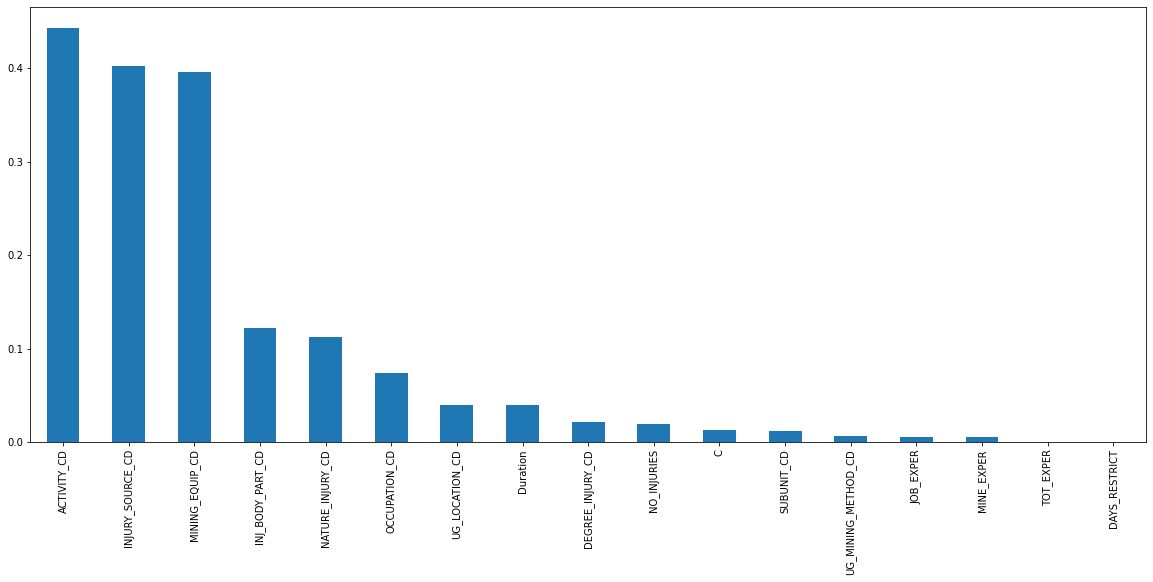

In [98]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [99]:
new_df4=new_df3.drop(['DEGREE_INJURY_CD', 'UG_LOCATION_CD', 'MINE_EXPER','Duration', 'C'],axis=1)


In [100]:
x1_df=new_df4.drop(['CLASSIFICATION'],axis=1)
y1_df=new_df4['CLASSIFICATION']

In [101]:
x1_df.columns

Index(['SUBUNIT_CD', 'UG_MINING_METHOD_CD', 'MINING_EQUIP_CD', 'NO_INJURIES',
       'TOT_EXPER', 'JOB_EXPER', 'OCCUPATION_CD', 'ACTIVITY_CD',
       'INJURY_SOURCE_CD', 'NATURE_INJURY_CD', 'INJ_BODY_PART_CD',
       'DAYS_RESTRICT'],
      dtype='object')

In [102]:
x2_df=x1_df.drop(['SUBUNIT_CD', 'UG_MINING_METHOD_CD','TOT_EXPER', 'JOB_EXPER','DAYS_RESTRICT'],axis=1)

In [103]:
new_df4['CLASSIFICATION'].unique()

array(['HANDLING OF MATERIALS', 'SLIP OR FALL OF PERSON', 'HAULAGE',
       'FIRE/EXPLOSION', 'EXPLOSIVES AND BREAKING AGENTS', 'ELECTRICAL',
       'EXPLODING VESSELS UNDER PRESSURE', 'OTHER'], dtype=object)

In [163]:
y1_df=Le.fit_transform(y1_df)

In [164]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(x2_df,y1_df,test_size=0.8)

In [165]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=40)
model.fit(X1_train,Y1_train)

RandomForestClassifier(n_estimators=40)

In [166]:
model.score(X1_test,Y1_test)

0.9105746344780686

In [199]:
from sklearn.model_selection import StratifiedKFold
kf=KFold(n_splits=10)

In [168]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [169]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [170]:
import xgboost as xgb


In [196]:
n_estimators=list(range(50,400,50))
n_estimators

[50, 100, 150, 200, 250, 300, 350]

In [216]:
model_params={
    
    'random forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,20,30,40],
            'criterion':['gini', 'entropy', 'log_loss']
        }
    },
    
    'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[5,10,15,20,30,40]
        }
    },
    'AdaBoostClassifier':{
        'model':AdaBoostClassifier(),
        'params':{
        }
    },
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini', 'entropy', 'log_loss'],
        }
    },
    'XG_boost':{
        'model':xgb.XGBClassifier(),
        'params':{ 
            'n_estimators':n_estimators,
            'learning_rate':[0.1,0.3,0.5,0.6]
            
        }
    }
    
}



In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
scores=[]
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
for model_name,mp in model_params.items():
    clf=GridSearchCV(estimator=mp['model'],param_grid=mp['params'],cv=kfold,return_train_score=False)
    clf.fit(x2_df,y1_df)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
        
    })
    

C:\Users\umar1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\umar1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\umar1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\umar1\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Para

In [219]:
scores

[{'model': 'random forest',
  'best_score': 0.9236949127477079,
  'best_params': {'criterion': 'entropy', 'n_estimators': 40}},
 {'model': 'KNeighborsClassifier',
  'best_score': 0.8563638716356108,
  'best_params': {'n_neighbors': 5}},
 {'model': 'AdaBoostClassifier',
  'best_score': 0.8365075051759835,
  'best_params': {}},
 {'model': 'DecisionTreeClassifier',
  'best_score': 0.8959460958296361,
  'best_params': {'criterion': 'entropy'}},
 {'model': 'XG_boost',
  'best_score': 0.9389287562851228,
  'best_params': {'learning_rate': 0.1, 'n_estimators': 150}}]

[{'model': 'random forest',
  'best_score': 0.9224489795918368,
  'best_params': {'criterion': 'entropy', 'n_estimators': 30}},

In [209]:
#from sklearn.ensemble import RandomForestClassifier
#rf_model=RandomForestClassifier(criterion='entropy',n_estimators=30)
rf_model2=xgb.XGBClassifier()

In [210]:

rf_model2.fit(X1_train,Y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [211]:

rf_model2.score(X1_test,Y1_test)

0.9112546752805168

In [212]:
Y1_pred=rf_model.predict(X1_test)

In [213]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y1_test,Y1_pred)
acc=accuracy_score(Y1_test,Y1_pred)


In [214]:
cm

array([[  16,    1,    0,    0,   33,    2,    0,    0],
       [   0,    0,    0,    0,   11,    0,    0,    0],
       [   0,    0,    0,    0,    2,    0,    0,    0],
       [   0,    0,    0,    0,    6,    1,    0,    0],
       [   1,    5,    0,    0, 4037,   95,    0,   39],
       [   0,    1,    0,    0,  185, 1170,    0,   22],
       [   0,    0,    0,    0,    7,    1,    0,    1],
       [   0,    0,    0,    0,  104,   40,    0,  102]], dtype=int64)

In [130]:
acc

0.916695001700102

<AxesSubplot:>

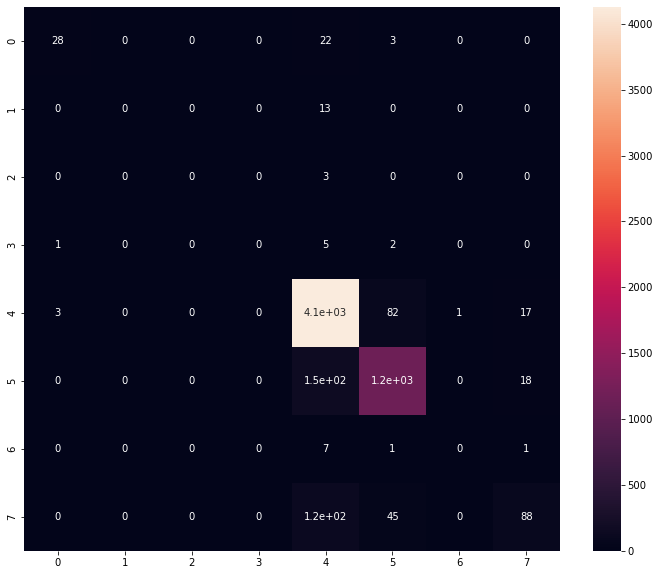

In [131]:
plt.figure(figsize=(12,10))

sbn.heatmap(cm,annot=True)

In [132]:
new_df4['CLASSIFICATION'].unique()

array(['HANDLING OF MATERIALS', 'SLIP OR FALL OF PERSON', 'HAULAGE',
       'FIRE/EXPLOSION', 'EXPLOSIVES AND BREAKING AGENTS', 'ELECTRICAL',
       'EXPLODING VESSELS UNDER PRESSURE', 'OTHER'], dtype=object)

In [133]:

Y1_test.value_counts()

HANDLING OF MATERIALS               4229
HAULAGE                             1315
SLIP OR FALL OF PERSON               252
ELECTRICAL                            53
EXPLODING VESSELS UNDER PRESSURE      13
OTHER                                  9
FIRE/EXPLOSION                         8
EXPLOSIVES AND BREAKING AGENTS         3
Name: CLASSIFICATION, dtype: int64

In [154]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
new_df4['Y_new']=Le.fit_transform(new_df4['CLASSIFICATION'])

In [158]:
Y_new=new_df4['Y_new'].unique()

In [147]:
x2_df['INJ_BODY_PART_CD']=x2_df['INJ_BODY_PART_CD'].astype(int)

In [153]:
Y_new

array([4, 4, 4, ..., 6, 6, 6])

In [159]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(x2_df,new_df4['Y_new'],test_size=0.8)

In [160]:
new_model=xgb.XGBClassifier()

In [161]:
new_model.fit(X1_train,Y1_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got [0 1 3 4 5 6 7]